In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset

combined_df = pd.merge(trial_df, drug_df, how="left", on=["Mouse ID","Mouse ID"])
# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor = combined_df.groupby(['Drug','Timepoint'])
tumor_volume = tumor['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor = pd.DataFrame(tumor_volume)
# Preview DataFrame
mean_tumor = mean_tumor.reset_index()

In [4]:
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = tumor['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
se_tumor = pd.DataFrame(tumor_se)
# Preview DataFrame
se_tumor = se_tumor.reset_index()

In [6]:
se_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_pivot = mean_tumor.pivot(index ='Timepoint', columns ='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
mean_tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


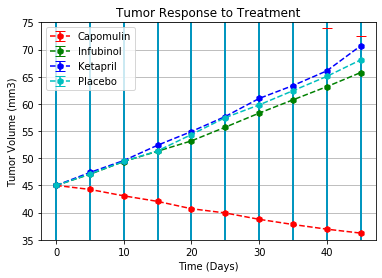

In [8]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_pivot.index,mean_tumor_pivot['Capomulin'],yerr = mean_tumor_pivot['Capomulin'],color='r', fmt='--h', capsize=5,label = 'Capomulin')
plt.errorbar(mean_tumor_pivot.index,mean_tumor_pivot['Infubinol'],yerr = mean_tumor_pivot['Infubinol'],color='g', fmt='--h', capsize=5,label = 'Infubinol')
plt.errorbar(mean_tumor_pivot.index,mean_tumor_pivot['Ketapril'],yerr = mean_tumor_pivot['Ketapril'],color='b', fmt='--h', capsize=5,label = 'Ketapril')
plt.errorbar(mean_tumor_pivot.index,mean_tumor_pivot['Placebo'],yerr = mean_tumor_pivot['Placebo'],color='c', fmt='--h', capsize=5,label = 'Placebo')

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.ylim(35,75)
plt.legend(loc = 'upper left')
plt.grid()
# Save the Figure
plt.savefig("tumor_response.png")


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met = combined_df.groupby(['Drug','Timepoint'])
met_volume = met['Metastatic Sites'].mean()
# Convert to DataFrame
mean_met = pd.DataFrame(met_volume)
# Preview DataFrame
mean_met = mean_met.reset_index()

In [10]:
mean_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_se = met['Metastatic Sites'].sem()
# Convert to DataFrame
se_met = pd.DataFrame(met_se)
# Preview DataFrame
se_met = se_met.reset_index()

In [12]:
se_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_pivot = mean_met.pivot(index ='Timepoint', columns ='Drug')['Metastatic Sites']
# Preview that Reformatting worked
mean_met_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


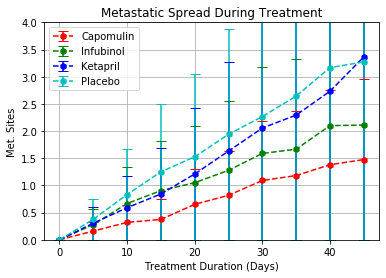

In [14]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_pivot.index,mean_met_pivot['Capomulin'],yerr = mean_met_pivot['Capomulin'],color='r', fmt='--h', capsize=5, label = 'Capomulin')
plt.errorbar(mean_met_pivot.index,mean_met_pivot['Infubinol'],yerr = mean_met_pivot['Infubinol'],color='g', fmt='--h', capsize=5, label = 'Infubinol')
plt.errorbar(mean_met_pivot.index,mean_met_pivot['Ketapril'],yerr = mean_met_pivot['Ketapril'], color='b', fmt='--h', capsize=5, label = 'Ketapril')
plt.errorbar(mean_met_pivot.index,mean_met_pivot['Placebo'],yerr = mean_met_pivot['Placebo'],color='c', fmt='--h', capsize=5, label = 'Placebo')

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.ylim(0,4)
plt.legend(loc = 'upper left')

# Save the Figure
plt.savefig("met_treatment.png")
# Show the Figure
plt.grid()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = combined_df.groupby(['Drug','Timepoint'])
mice_count = mice['Mouse ID'].count()
# Convert to DataFrame
count_mice = pd.DataFrame(mice_count)
# Preview DataFrame
count_mice = count_mice.reset_index()

In [16]:
count_mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_pivot = count_mice.pivot(index ='Timepoint', columns ='Drug')['Mouse ID']
# Preview that Reformatting worked
count_mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


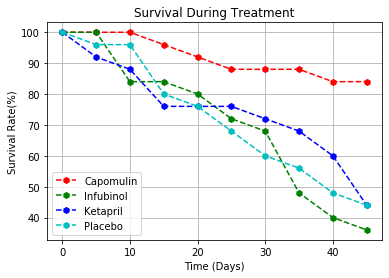

In [18]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(count_mice_pivot.index,count_mice_pivot['Capomulin']*100/25, color='r', fmt='--h', capsize=5,label = 'Capomulin')
plt.errorbar(count_mice_pivot.index,count_mice_pivot['Infubinol']*100/25, color='g', fmt='--h', capsize=5,label = 'Infubinol')
plt.errorbar(count_mice_pivot.index,count_mice_pivot['Ketapril']*100/25, color='b', fmt='--h', capsize=5,label = 'Ketapril')
plt.errorbar(count_mice_pivot.index,count_mice_pivot['Placebo']*100/25, color='c', fmt='--h', capsize=5,label = 'Placebo')

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")

#plt.ylim(0,100)
plt.legend(loc = 'lower left')
# Save the Figure
plt.savefig("survival.png")

plt.grid()
# Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
percentage_change = (mean_tumor_pivot.iloc[-1]/(mean_tumor_pivot.iloc[0])-1)*100

# Display the data to confirm

In [20]:
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

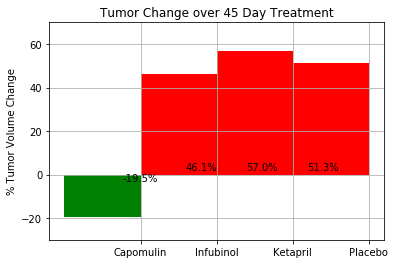

In [33]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc.
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']  
change_list = [(percentage_change[drug])for drug in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'red'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
x_axis = np.arange(0, len(drug_list))
tick_locations = []
count = 0
for x in x_axis:
    tick_locations.append(x)
   
plt.xticks(tick_locations, drug_list)
colors = []
 
for r in change_list:
    if r < 0:
        y_co = -3.0
    else:
        y_co = 2
    plt.text(count, y_co, str(round(r, 1)) + '%', ha = 'center', color = 'black')
    count += .80
#Call functions to implement the function calls

# Save the Figure
plt.savefig("summary.png")

# Show the Figure